# **Analisis Hubungan Narasi Sinopsis terhadap Rating Penonton dengan Pendekatan Text Analytics**

1. Profile Dataset (Template Poin 2)

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('top_rated_movies.csv')

# Menampilkan informasi struktur data
print("--- Informasi Struktur Data ---")
df.info()

# Menampilkan statistik deskriptif untuk kolom numerik (Rating & Popularitas)
print("\n--- Statistik Deskriptif ---")
print(df[['vote_average', 'popularity', 'vote_count']].describe())

# Menampilkan 5 data teratas
print("\n--- Contoh Data ---")
print(df.head())

--- Informasi Struktur Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18520 entries, 0 to 18519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18520 non-null  int64  
 1   id            18520 non-null  int64  
 2   title         18520 non-null  object 
 3   overview      18518 non-null  object 
 4   release_date  18516 non-null  object 
 5   popularity    18520 non-null  float64
 6   vote_average  18520 non-null  float64
 7   vote_count    18520 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB

--- Statistik Deskriptif ---
       vote_average    popularity    vote_count
count  18520.000000  18520.000000  18520.000000
mean       6.802412      4.216869   2148.693143
std        0.623615      8.833169   3402.029522
min        5.400000      0.003100    300.000000
25%        6.319750      1.818400    480.000000
50%        6.781500      2.907100    893.000000
75

2. Data Preprocessing (Template Poin 3)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK tersedia
nltk.download('stopwords')
nltk.download('wordnet')

# Menghapus nilai null pada kolom penting
df = df.dropna(subset=['overview', 'vote_average'])

def clean_text(text):
    # 1. Menghapus karakter non-alfabet (angka/simbol)
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    # 2. Case Folding (kecilkan semua huruf)
    text = text.lower()
    # 3. Stopwords Removal (menghapus kata umum yang tidak bermakna)
    stop_words = set(stopwords.words('english'))
    words = [w for w in text.split() if w not in stop_words]
    # 4. Lemmatization (mengembalikan ke kata dasar)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

# Terapkan pembersihan
df['cleaned_overview'] = df['overview'].apply(clean_text)

# Feature Engineering sederhana (Menghitung panjang kata)
df['word_count'] = df['overview'].apply(lambda x: len(str(x).split()))

print("Preprocessing Selesai.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Preprocessing Selesai.


3. Exploratory Data Analysis (Template Poin 4)

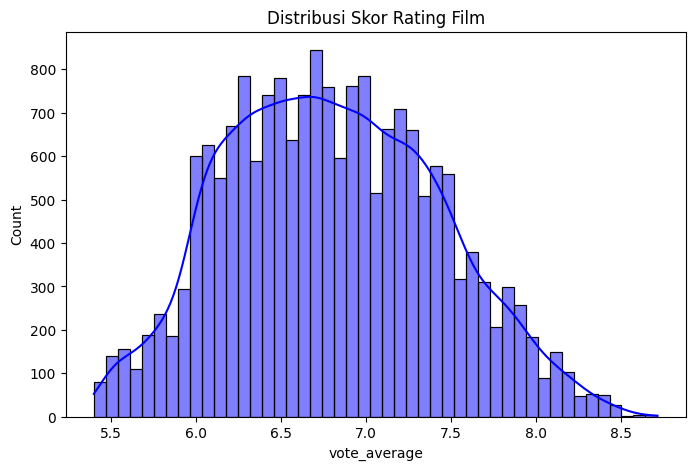

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Plot Distribusi Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['vote_average'], kde=True, color='blue')
plt.title('Distribusi Skor Rating Film')
plt.savefig('distribusi_rating.png')

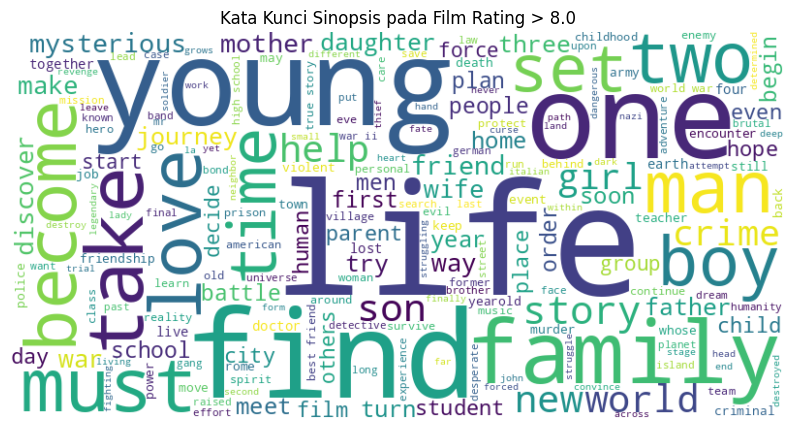

In [ ]:
# 2. Word Cloud (Kata kunci pada film rating tinggi)
high_rated_text = " ".join(df[df['vote_average'] > 8.0]['cleaned_overview'])
wc = WordCloud(width=800, height=400, background_color='white').generate(high_rated_text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Kunci Sinopsis pada Film Rating > 8.0')
plt.savefig('wordcloud.png')

plt.show()

4. Seleksi Fitur (Template Poin 5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression

# Mengubah teks menjadi vektor angka (TF-IDF)
tfidf = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf.fit_transform(df['cleaned_overview'])
y = df['vote_average']

# Seleksi 500 fitur kata yang paling berkorelasi dengan rating
selector = SelectKBest(score_func=f_regression, k=500)
X_selected = selector.fit_transform(X_tfidf, y)

print(f"Jumlah fitur awal: {X_tfidf.shape[1]}")
print(f"Jumlah fitur setelah seleksi: {X_selected.shape[1]}")

Jumlah fitur awal: 2000
Jumlah fitur setelah seleksi: 500


5. Modeling (Template Poin 6)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Menggunakan Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Simpan Model ke file .pkl (Wajib sesuai template)
with open('model_uas_bddm.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil dilatih dan disimpan sebagai 'model_uas_bddm.pkl'")

Model berhasil dilatih dan disimpan sebagai 'model_uas_bddm.pkl'


6. Evaluasi Model (Template Poin 7)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi pada data test
y_pred = model.predict(X_test)

# Hitung Metrik
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"--- Hasil Evaluasi ---")
print(f"Mean Absolute Error (MAE) : {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R2)      : {r2:.4f}")

--- Hasil Evaluasi ---
Mean Absolute Error (MAE) : 0.2921
Root Mean Squared Error (RMSE): 0.4206
R-squared Score (R2)      : 0.5394


7. Simpan Model

In [15]:
import pickle
from google.colab import files # Tambahkan ini jika menggunakan Google Colab

# 1. Menyimpan Model (Serialisasi)
# Kita simpan model RandomForest yang sudah dilatih ke dalam file .pkl
file_name = 'model_uas_bddm_fata.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(model, file)

print(f"Model berhasil disimpan dengan nama: {file_name}")

# 2. Menyimpan Vectorizer (Opsional tapi Disarankan)
# Karena model Anda bergantung pada TF-IDF, sebaiknya simpan juga vectorizer-nya
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# 3. Instruksi Download (Jika di Google Colab)
# Jalankan baris ini untuk langsung mengunduh file ke komputer Anda
# files.download(file_name)
# files.download('tfidf_vectorizer.pkl')

Model berhasil disimpan dengan nama: model_uas_bddm_fata.pkl
